## Introduction ##

This dataset is a fashion dataset, where thousands of small images are collected and labeled. Therefore it is a supervised problem. There are multiple ways to conquer this task, but my approach was to use a CNN to predict the fashion images.

There are two main files. The "fashion-mnist_train.csv" and the "fasion-mnist_test.csv" file. Both are csv files and they do have in the first column the label corresponding to the correct output. Then we have a lot of pixel values in each single other column.

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

With those two lines we can see the data and how it is structured. We see that the first column is the label column, so the correct output, which are integers from 0 to 9. Then we have the pixel values in each other column. We see that these values are some weird rgb values. So we need to normalize this data and divide it by 255 to get the actually pixel value between 0 and 1.

In [3]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211.0,220.0,214.0,74.0,0.0,255.0,222.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,12.0,0.0,0.0,40.0,134.0,162.0,191.0,214.0,163.0,146.0,165.0,79.0,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171.0,249.0,207.0,197.0,202.0,45.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,21.0,25.0,69.0,52.0,45.0,74.0,39.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230.0,237.0,229.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,116.0,112.0,136.0,147.0,144.0,121.0,102.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Seperating the data ##
Now, we need to seperate the features and the labels. There are many ways you can seperate the data, but I've used iloc to seperate it.

In [4]:
labels = df_train.iloc[:,0]
labels.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [5]:
features = df_train.iloc[:,1:]
features.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211.0,220.0,214.0,74.0,0.0,255.0,222.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,12.0,0.0,0.0,40.0,134.0,162.0,191.0,214.0,163.0,146.0,165.0,79.0,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171.0,249.0,207.0,197.0,202.0,45.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,21.0,25.0,69.0,52.0,45.0,74.0,39.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230.0,237.0,229.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,116.0,112.0,136.0,147.0,144.0,121.0,102.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here we have a given array and a function which returns the actual class of the image. For example, we have a image showing a pullover. Therefore, we need to select 'class_names[2]' to get the corresponding name. We are doing this, because the labels are only numbers and we need a way to output everything for a actual human.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def get_name_of_label(label):
    return class_names[label]

Now we are plotting some test data, to get a feeling how the data looks like. We are setting the corresponding label as the plot title.

As I said before we need to divide the values of this feature by 255 because we need to get the rgb value between 0 and 1. Then it is easier for the CNN to learn and to visualize it.

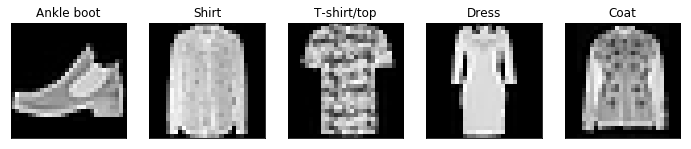

In [7]:
plt.figure(figsize=(12, 8))
for i in range(1, 6):
    plt.subplot(150+i)
    plt.imshow(np.reshape(features.loc[i].values/255, (28, 28)), 'gray')
    plt.title(get_name_of_label(labels[i]))
    plt.xticks([])
    plt.yticks([])

## Training the CNN ##
We are reshaping the values, because we just want a representation of the image in the size of 28x28.

In [0]:
features = features.values.reshape(-1, 28, 28, 1)

Now we are creating the model by using keras in tensorflow. We do have a input layer of 28x28. For representing every single pixel.

We do have a conv 2d layer of 32 neurons and with a scanning size of 3x3. We are using the relu activation function.

Then we have a max pooling of a 2x2 grid and again a layer of 64 convolutional neurons with the relu activation function. After that we have the pooling layer again.

Furthermore, we are flattening the whole thing and then we will connect 128 neurons with this flattened layer. We will use the relu activation function again.

In the end, we will use 10 output neurons (because we do have 10 output possibilities) with the softmax activation function to get a prober probability value for each output neuron.

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


We will use the adam optimizer and the sparse categorical crossentropy loss function, because the adam optimizer is the best for this problem and the loss function is pretty default for a classical cnn.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Here we are training the model by normalizing the features again. We will use hyperparameters epochs = 10 and batch size = 32. Furthermore, we will use a 80/20 split for validation.

In [11]:
history = model.fit(features/255, labels, epochs=10, batch_size=32, validation_split=0.2, shuffle=True)

Train on 1892 samples, validate on 473 samples
Epoch 1/10
1892/1892 [==============================] - 3s 2ms/sample - loss: 1.1661 - acc: 0.5788 - val_loss: nan - val_acc: 0.7357
Epoch 2/10
1892/1892 [==============================] - 3s 1ms/sample - loss: 0.6114 - acc: 0.7759 - val_loss: nan - val_acc: 0.7653
Epoch 3/10
1892/1892 [==============================] - 3s 1ms/sample - loss: 0.5075 - acc: 0.8103 - val_loss: nan - val_acc: 0.7717
Epoch 4/10
1892/1892 [==============================] - 3s 1ms/sample - loss: 0.4395 - acc: 0.8340 - val_loss: nan - val_acc: 0.7949
Epoch 5/10
1892/1892 [==============================] - 3s 1ms/sample - loss: 0.4533 - acc: 0.8462 - val_loss: nan - val_acc: 0.7949
Epoch 6/10
1892/1892 [==============================] - 3s 1ms/sample - loss: 0.3687 - acc: 0.8626 - val_loss: nan - val_acc: 0.8055
Epoch 7/10
1892/1892 [==============================] - 3s 1ms/sample - loss: 0.3277 - acc: 0.8747 - val_loss: nan - val_acc: 0.8203
Epoch 8/10
1892/1892 [

## Plotting the model## 
In this section we will plot the accuracy and the loss of the model. This is good for seeing, if we have a overfit/underfit or a good model.

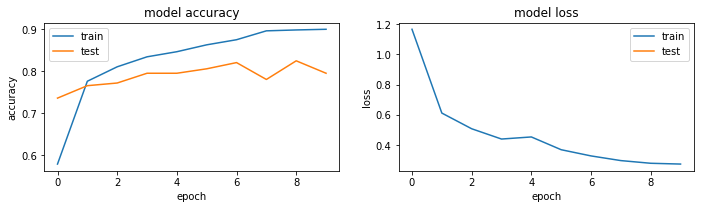

In [12]:
plt.figure(figsize=(18, 6))

plt.subplot(231)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(232)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

## Testing the model ##
In this section we will test the model by using the 'fashion-mnist_test.csv' file.

In [13]:
df_test = pd.read_csv('fashion-mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242.0,245.0,224.0,245.0,234.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,69.0,94.0,123.0,127.0,138.0,138.0,142.0,145.0,135.0,125.0,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248.0,238.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,233.0,155.0,0.0,65.0,235.0,216.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0.0,0.0,0.0,0.0,0.0,0.0,87.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,50.0,29.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255.0,255.0,254.0,252.0,255.0,101.0,196.0,254.0,252.0,100.0,0.0,0.0,0.0,0.0,0.0,168.0,232.0,225.0,0.0,41.0,172.0,147.0,148.0,153.0,155.0,146.0,137.0,141.0,143.0,137.0,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,69.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here we are seperating the labels and the features again. The structure of the data is the same as in the training file.

In [0]:
test_labels = df_test['label']
test_features = df_test.iloc[:, 1:]

Now we will evaluate the model by reshaping the test features values again to the corresponding 28x28 size.

In [15]:
test_loss, test_accuracy = model.evaluate(test_features.values.reshape(-1, 28, 28, 1), test_labels)

3778/3778 [==============================] - 1s 370us/sample - loss: nan - acc: 0.8256


## Plotting the test data ##
In this small section we will use some test data and predict the output of this image. We will use the predict function to get the predictions of this image, that the model has made.

In [0]:
predictions = []
for i in range(0, 20):
    predictions.append(model.predict(test_features.loc[i].values.reshape(-1, 28, 28, 1)))

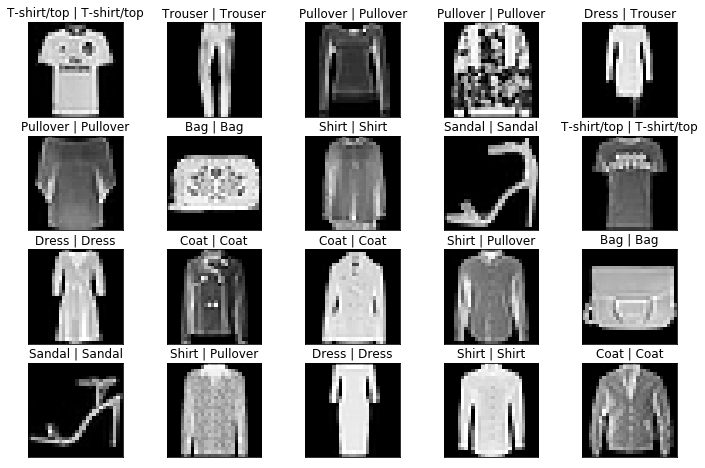

In [17]:
plt.figure(figsize=(12, 8))
for i in range(0, 20):
    plt.subplot(4, 5, i+1)
    plt.imshow(np.reshape(test_features.loc[i].values/255, (28, 28)), 'gray')
    plt.xticks([])
    plt.yticks([])
    prediction = np.argmax(predictions[i])
    plt.title('{} | {}'.format(get_name_of_label(test_labels[i]), get_name_of_label(prediction)))

## Conclusion ##
There are many ways to classify those images, but my personal favourite is the CNN way. CNN's are good for classification problems and therefore it is a good thing to test your knowledge with it.

Furthermore you can test this notebook and maybe built a better solution by optimizing the hyperparameters.